In [28]:
#Weather API HW

# calling dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

# API key setup
api_key =  'a15fd3c1316b096c87f337fb54a7194b'
temp_units = "imperial"
output = "Output/weather_df.csv"

# establishing geographic range for query
lat_range = (-90, 90)
long_range = (-180, 180)


# calling weatherpy url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

In [29]:
#generating city data
randomwalk_lat = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1000)
randomwalk_long =  np.random.uniform(low=lat_range[0], high=long_range[1], size=1000)
lats_and_longs = zip(randomwalk_lat, randomwalk_long)
cities = []
countries = []

#creating variables assigned randomly generated values based on max lat and long range lists        


#loops through list of random coordinates to create an evenly geographically distributed list of global cities
for lat_and_long in lats_and_longs:
    #assign random city by calling on variables created by numpy's random function
    citydata = citipy.nearest_city(lat_and_long[0], lat_and_long[1])
    city = citydata.city_name
    country = citydata.country_code
    #ensure city isn't already part of the list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
        
        
len(cities)




483

In [30]:
#create series of scatterplots to showcase the following
# passthroughs
#Create a dataframe to store the data
city_weather = {
    'City': cities,
    'Cloudiness': "",
    'Country': countries,
    'Date': "",
    'Humidity': "", 
    'Latitude': "", 
    'Longitude': "", 
    'Max Temperature': "",
    'Windspeed': ""}

city_pd = pd.DataFrame(city_weather)

#Preview the dataframe

In [6]:
print(response)


{'coord': {'lon': 4.2658, 'lat': 39.8885}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 43.29, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1037, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1613388521, 'sys': {'type': 1, 'id': 6422, 'country': 'ES', 'sunrise': 1613370947, 'sunset': 1613409516}, 'timezone': 3600, 'id': 2514301, 'name': 'Mahon', 'cod': 200}


In [181]:
Counter = 1
Set = 1

for weather_data, row in city_pd.iterrows():
    to_retrieve = query_url + str(row['City']) + ',' + str(row['Country']) + '&APPID=' + api_key
    response = requests.get(to_retrieve).json()

    
    try: 
        print(f'Processing weather data for Record {Counter} of Set {Set} | {response["name"]}')
        
        city_pd.loc[weather_data, 'Cloudiness'] = response['clouds']['all']
        city_pd.loc[weather_data, 'Date'] = response['dt']
        city_pd.loc[weather_data, 'Humidity'] = response['main']['humidity']
        city_pd.loc[weather_data, 'Latitude'] = response['coord']['lat']
        city_pd.loc[weather_data, 'Longitude'] = response['coord']['lon']
        city_pd.loc[weather_data, 'Max Temperature'] = response['main']['temp_max']
        city_pd.loc[weather_data, 'Windspeed'] = response['wind']['speed']

        Counter += 1
    except(KeyError, IndexError):
        print("City Not Found")
        
    if Counter == 51:
        Set += 1
        Counter = 1
        
#         lat.append(response['coord']['lat'])
#         temp.append(response['main']['temp'])
       

print("-------------- Retrieval Complete --------------")        
    

Processing weather data for Record 1 of Set 1 | Bengkulu
Processing weather data for Record 2 of Set 1 | Camacha
Processing weather data for Record 3 of Set 1 | Bluff
Processing weather data for Record 4 of Set 1 | Saint-Philippe
Processing weather data for Record 5 of Set 1 | Kāvali
Processing weather data for Record 6 of Set 1 | Klaksvík
Processing weather data for Record 7 of Set 1 | Taywarah
Processing weather data for Record 8 of Set 1 | Ushuaia
Processing weather data for Record 9 of Set 1 | Pindwāra
Processing weather data for Record 10 of Set 1 | Georgetown
Processing weather data for Record 11 of Set 1 | Santa Marta
Processing weather data for Record 12 of Set 1 | Nikolskoye
Processing weather data for Record 13 of Set 1 | Hobart
Processing weather data for Record 14 of Set 1 | Severo-Kuril'sk
Processing weather data for Record 15 of Set 1 | Butaritari
Processing weather data for Record 16 of Set 1 | Ribeira Grande
Processing weather data for Record 17 of Set 1 | Busselton
Pro

Processing weather data for Record 42 of Set 3 | Lüderitz
Processing weather data for Record 43 of Set 3 | Manitouwadge
Processing weather data for Record 44 of Set 3 | Torbay
Processing weather data for Record 45 of Set 3 | Portland
Processing weather data for Record 46 of Set 3 | Chauk
Processing weather data for Record 47 of Set 3 | Novhorodka
Processing weather data for Record 48 of Set 3 | Shingū
Processing weather data for Record 49 of Set 3 | Cuiluan
Processing weather data for Record 50 of Set 3 | Nkhotakota
Processing weather data for Record 1 of Set 4 | Tacuarembó
Processing weather data for Record 2 of Set 4 | Sittwe
Processing weather data for Record 3 of Set 4 | Chara
Processing weather data for Record 4 of Set 4 | Charters Towers
Processing weather data for Record 5 of Set 4 | Saldanha
Processing weather data for Record 6 of Set 4 | Yārāda
Processing weather data for Record 7 of Set 4 | Aktau
Processing weather data for Record 8 of Set 4 | Lodeynoye Pole
Processing weathe

Processing weather data for Record 33 of Set 6 | Baykit
Processing weather data for Record 34 of Set 6 | Nouakchott
Processing weather data for Record 35 of Set 6 | Aykhal
Processing weather data for Record 36 of Set 6 | Kita
Processing weather data for Record 37 of Set 6 | Hirara
Processing weather data for Record 38 of Set 6 | Port Macquarie
Processing weather data for Record 39 of Set 6 | Erbaa
Processing weather data for Record 40 of Set 6 | Sangar
Processing weather data for Record 41 of Set 6 | Tahoua
Processing weather data for Record 42 of Set 6 | Nola
Processing weather data for Record 43 of Set 6 | Waddān
Processing weather data for Record 44 of Set 6 | Baruun-Urt
Processing weather data for Record 45 of Set 6 | Gilgit
Processing weather data for Record 46 of Set 6 | Panan
Processing weather data for Record 47 of Set 6 | Portoferraio
Processing weather data for Record 48 of Set 6 | Rundu
Processing weather data for Record 49 of Set 6 | Bubaque
Processing weather data for Reco

Processing weather data for Record 24 of Set 9 | Washington
Processing weather data for Record 25 of Set 9 | Tanete
Processing weather data for Record 26 of Set 9 | Bichena
Processing weather data for Record 27 of Set 9 | Lixouri
Processing weather data for Record 28 of Set 9 | Dīglūr
Processing weather data for Record 29 of Set 9 | Semporna
Processing weather data for Record 30 of Set 9 | Honiara
Processing weather data for Record 31 of Set 9 | Majene
Processing weather data for Record 32 of Set 9 | Zyryanka
-------------- Retrieval Complete --------------


In [182]:
#preview the filled dataframe
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,bengkulu,100.0,ID,1613395278,85.0,-3.8004,102.266,79.50,3.29
1,camacha,40.0,PT,1613395348,72.0,33.0833,-16.3333,64.40,8.05
2,bluff,91.0,NZ,1613395348,81.0,-46.6,168.333,48.00,1.01
3,saint-philippe,90.0,RE,1613395348,61.0,-21.3585,55.7679,84.20,4.61
4,kavali,0.0,IN,1613395349,70.0,14.9167,79.9833,74.23,8.81


In [183]:
#dataframe cleaning
#dropping empty city values unfound in WeatherPy database
city_pd = city_pd.dropna()
#fixing format of Max Temp values by converting them into a float value from a string (was throwing an error in matplot)
city_pd['Max Temperature'] = pd.to_numeric(city_pd['Max Temperature'],errors='coerce')


In [184]:
#write to CSV
city_pd.to_csv('Global Weather Data.csv')

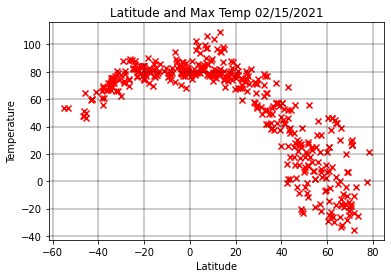

In [185]:
#Temperature v. Latitude
X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Max Temperature']
Time = time.strftime("%m/%d/%Y")

plt.scatter(city_pd['Latitude'], city_pd['Max Temperature'], marker = 'x', color = 'red')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Temperature')
plt.title(f'Latitude and Max Temp {Time}')
plt.show()
#Analysis: Higher latitudes are associated with lower temperatures, most likely because there are far fewer southern cities 
#in the far southern latitudes compared to the far geographic north 

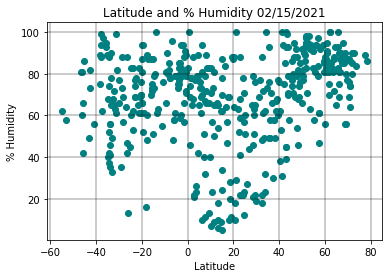

In [186]:
#Humidity (%) vs. Latitude

X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Humidity']
plt.scatter(city_pd['Latitude'], city_pd['Humidity'], marker = 'o', color = 'teal')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('% Humidity')
plt.title(f'Latitude and % Humidity {Time}')
plt.show()

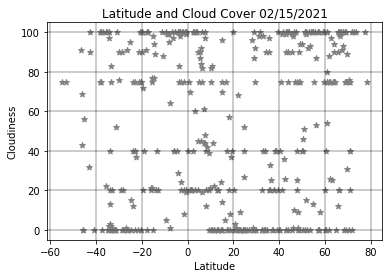

In [187]:
#Cloudiness (%) vs. Latitude

X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Cloudiness']
plt.scatter(X_axis_values, Y_axis_values, marker = '*', color = 'gray')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title(f'Latitude and Cloud Cover {Time}')
plt.show()
#zero observable relationship

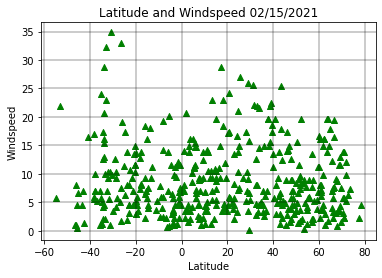

In [188]:
# Wind Speed (mph) vs. Latitude
X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Windspeed']
plt.scatter(X_axis_values, Y_axis_values, marker = '^', color = 'green')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Windspeed')
plt.title(f'Latitude and Windspeed {Time}')
plt.show()
#weak relationship, but outlier windspeeds clustered around -40 to -20 and 20 to 40 lat

In [189]:
#creating new dfs for northern and southern hemisphere
North_df = city_pd[city_pd['Latitude'] > 0]
South_df = city_pd[city_pd['Latitude'] < 0]

In [190]:
#display North df
North_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
1,camacha,40.0,PT,1613395348,72.0,33.0833,-16.3333,64.40,8.05
4,kavali,0.0,IN,1613395349,70.0,14.9167,79.9833,74.23,8.81
5,klaksvik,75.0,FO,1613395349,100.0,62.2266,-6.589,46.40,16.11
6,taywarah,0.0,AF,1613395349,49.0,33.35,64.4167,41.72,3.24
8,pindwara,52.0,IN,1613395350,23.0,24.8,73.0667,74.64,7.09


In [191]:
#display South df
South_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,bengkulu,100.0,ID,1613395278,85.0,-3.8004,102.266,79.50,3.29
2,bluff,91.0,NZ,1613395348,81.0,-46.6,168.333,48.00,1.01
3,saint-philippe,90.0,RE,1613395348,61.0,-21.3585,55.7679,84.20,4.61
7,ushuaia,75.0,AR,1613395180,62.0,-54.8,-68.3,53.60,5.75
9,georgetown,64.0,SH,1613395351,78.0,-7.9333,-14.4167,79.41,14.16


In [192]:
#run linear regression on relationship
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
from scipy import stats

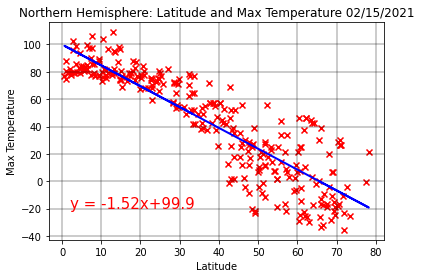

The r-value is -0.8842848994076286


In [193]:
#Northern Hemisphere - Temperature (F) vs. Latitude
#cleaning data to create line
Y_axis_values = North_df['Max Temperature'].astype(str).astype(float)
X_axis_values = North_df['Latitude'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = 'x', color = 'red')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "blue", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature')
m = (round(m, 2))
b = (round(b, 2))
plt.text(2, -20, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Northern Hemisphere: Latitude and Max Temperature {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")
Y_axis_values = []
X_axis_values = []

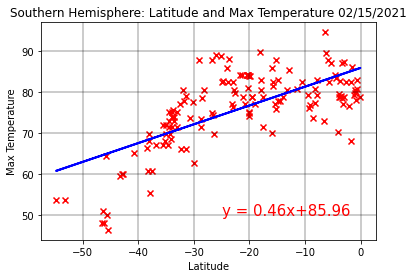

The r-value is 0.6820798896709092


In [194]:
#Southern Hemisphere - Temperature (F) vs. Latitude
#cleaning data to create line
Y_axis_values = South_df['Max Temperature'].astype(str).astype(float)
X_axis_values = South_df['Latitude'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = 'x', color = 'red')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "blue", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature')
m = (round(m, 2))
b = (round(b, 2))
plt.text(-25, 50, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Southern Hemisphere: Latitude and Max Temperature {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")

In [ ]:
#Relationship-Latitude to Temperature: There is an observable trend of an increase in 
#Max Temperature when traveling from either pole to the equator

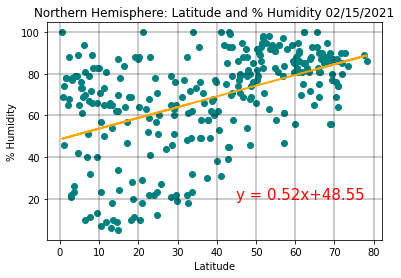

The r-value is 0.4702495443163669


In [204]:
#Northern Hemisphere - Humidity vs. Latitude
#cleaning data to create line
Y_axis_values = North_df['Humidity'].astype(str).astype(float)
X_axis_values = North_df['Latitude'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = 'o', color = 'teal')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "orange", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('% Humidity')
m = (round(m, 2))
b = (round(b, 2))
plt.text(45, 20, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Northern Hemisphere: Latitude and % Humidity {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")

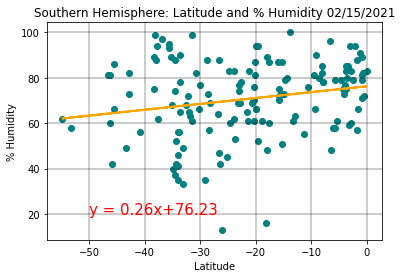

The r-value is 0.2101994163021405


In [206]:
#Southern Hemisphere - Humidity vs. Latitude
#cleaning data to create line
Y_axis_values = South_df['Humidity'].astype(str).astype(float)
X_axis_values = South_df['Latitude'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = 'o', color = 'teal')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "orange", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('% Humidity')
m = (round(m, 2))
b = (round(b, 2))
plt.text(-50, 20, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Southern Hemisphere: Latitude and % Humidity {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")

In [ ]:
#Relationship-Latitude to Humidity: There is a weak trend displaying an increase in humidity from poles to equator

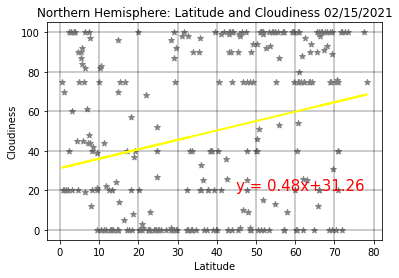

The r-value is 0.2588371610460617


In [213]:
#Northern Hemisphere - Latitude v. Cloudiness
#cleaning data to create line
Y_axis_values = North_df['Cloudiness'].astype(str).astype(float)
X_axis_values = North_df['Latitude'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = '*', color = 'gray')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "yellow", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
m = (round(m, 2))
b = (round(b, 2))
plt.text(45, 20, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Northern Hemisphere: Latitude and Cloudiness {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")

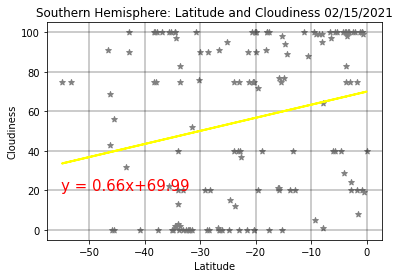

The r-value is 0.22492129885214546


In [214]:
#Southern Hemisphere - Latitude v. Cloudiness
#cleaning data to create line
Y_axis_values = South_df['Cloudiness'].astype(str).astype(float)
X_axis_values = South_df['Latitude'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = '*', color = 'gray')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "yellow", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
m = (round(m, 2))
b = (round(b, 2))
plt.text(-55, 20, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Southern Hemisphere: Latitude and Cloudiness {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")

In [ ]:
#Relationship-Latitude to Cloudiness: Almost trendless, however there are clusters which indicate higher cloudiness at the equator 
#and sunnyness at the mid-latitudes in the subtropics

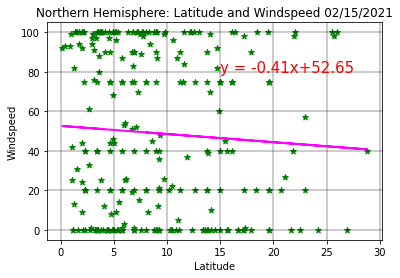

The r-value is -0.06167466225118201


In [218]:
#Northern Hemisphere - Latitude v. Windspeed
#cleaning data to create line
Y_axis_values = North_df['Cloudiness'].astype(str).astype(float)
X_axis_values = North_df['Windspeed'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = '*', color = 'green')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "magenta", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Windspeed')
m = (round(m, 2))
b = (round(b, 2))
plt.text(15, 80, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Northern Hemisphere: Latitude and Windspeed {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")

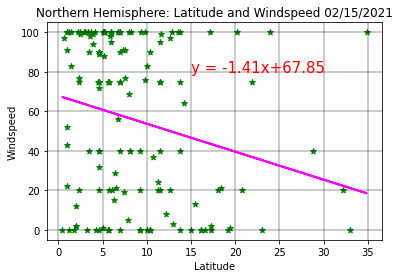

The r-value is -0.23069578632415935


In [219]:
#Southern Hemisphere - Latitude v. Windspeed
#cleaning data to create line
Y_axis_values = South_df['Cloudiness'].astype(str).astype(float)
X_axis_values = South_df['Windspeed'].astype(str).astype(float)
plt.scatter(X_axis_values, Y_axis_values, marker = '*', color = 'green')
(m, b) = np.polyfit(X_axis_values, Y_axis_values, 1)
plt.plot(X_axis_values, m*X_axis_values + b, "magenta", linewidth=2)
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Windspeed')
m = (round(m, 2))
b = (round(b, 2))
plt.text(15, 80, f"y = {m}x+{b}", color = 'red', fontsize = 15)
plt.title(f'Northern Hemisphere: Latitude and Windspeed {Time}')
plt.show()
slope, intercept, r_value, p_value, std_err  = stats.linregress(X_axis_values ,Y_axis_values)
print(f"The r-value is {r_value}")

In [ ]:
#Relationship-Latitude to Windspeed: There is no strong observable trend between latitude and measured windspeeds 